#Data Augmentation and evaluate classification 

In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import * 
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from matplotlib.pyplot import *

In [61]:
def visualize_data(images, categories, class_names):
    fig = figure(figsize=(14, 6))
    fig.patch.set_facecolor('gold')
    for i in range(3 * 7):
        subplot(3, 7, i+1)
        xticks([])
        yticks([])
        imshow(images[i])
        class_index = categories[i].argmax()
        xlabel(class_names[class_index])
    show()

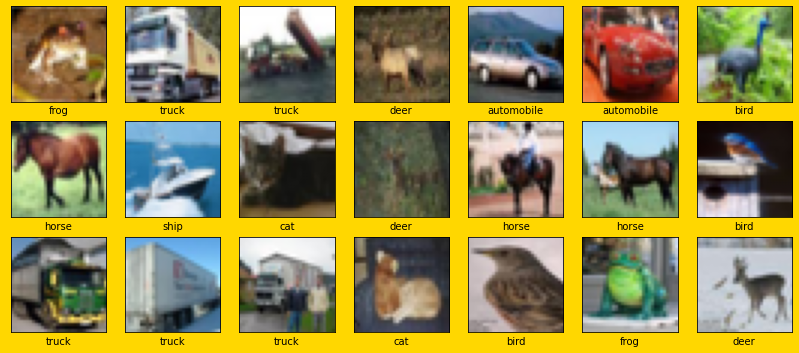

In [62]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

In [63]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPool2D((2,2)),
        Conv2D(64, (3, 3), activation='relu', padding='same',),
        Conv2D(64, (3, 3), activation='relu', padding='same',),
        MaxPool2D((2,2)),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        MaxPool2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')])


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

##Create a model with Augmentation

In [64]:
batch_size = 32
epochs = 16
modelWithoutAug = create_model()
modelWithoutAug.summary()

history_no_aug = modelWithoutAug.fit(x_train, y_train,epochs=epochs, batch_size=batch_size,validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = modelWithoutAug.evaluate(x_test,  y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

###Visualizing the network structure

In [65]:
%%capture
!pip install visualkeras

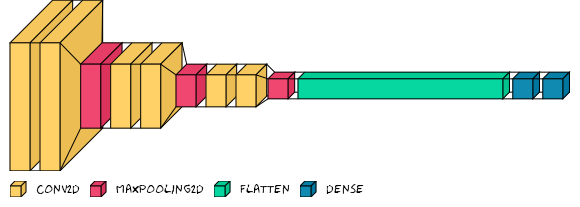

In [66]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(modelWithoutAug, legend=True) # without custom font
font = ImageFont.truetype("Humor-Sans.ttf", 12)
visualkeras.layered_view(modelWithoutAug, legend=True, font=font) # selected font

##Creating a model with data augmentation

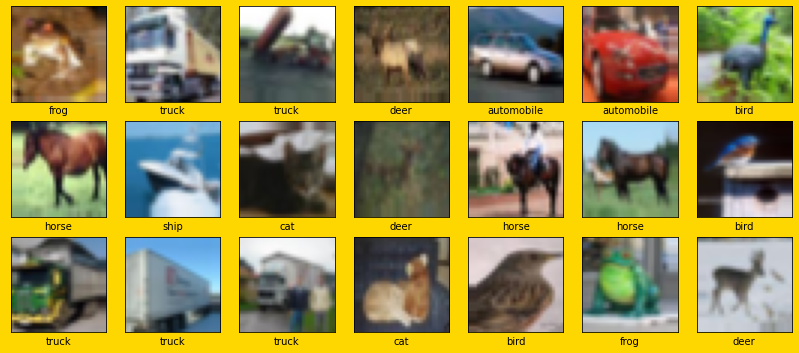

In [67]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

In [68]:
modelWithAug = create_model()
datagen.fit(x_train)

history_aug = modelWithAug.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test))
loss_aug, acc_aug = modelWithAug.evaluate(x_test,  y_test)

Epoch 1/16
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5980 - accuracy: 0.4095 - val_loss: 1.1975 - val_accuracy: 0.5568
Epoch 2/16
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1440 - accuracy: 0.5922 - val_loss: 1.0109 - val_accuracy: 0.6472
Epoch 3/16
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9624 - accuracy: 0.6593 - val_loss: 0.8800 - val_accuracy: 0.6866
Epoch 4/16
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8526 - accuracy: 0.6978 - val_loss: 0.7885 - val_accuracy: 0.7284
Epoch 5/16
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7721 - accuracy: 0.7284 - val_loss: 0.7648 - val_accuracy: 0.7321
Epoch 6/16
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7226 - accuracy: 0.7478 - val_loss: 0.7536 - val_accuracy: 0.7462
Epoch 7/16
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6843 - accuracy: 0.7614 - val_loss: 0.7195 -

###Visualizing the network structure

In [69]:
%%capture
!pip install visualkeras

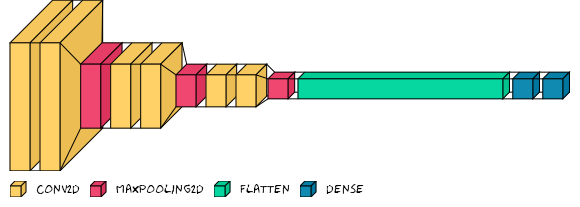

In [70]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(modelWithAug, legend=True) # without custom font
font = ImageFont.truetype("Humor-Sans.ttf", 12)
visualkeras.layered_view(modelWithAug, legend=True, font=font) # selected font

###Ploting the accuracy and loss comparison

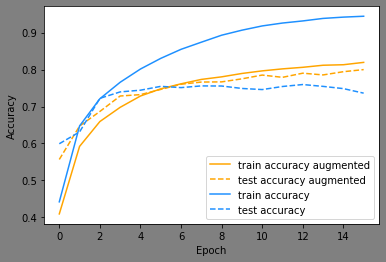

In [71]:
fig = plt.figure()
fig.patch.set_facecolor('gray')
fig.patch.set_fill('True')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

##Classification evaluation

###Report from the classification (Without Augmentation)

In [72]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.utils import to_categorical

y_pred = modelWithoutAug.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

y_pred_classesCat = to_categorical(y_pred_classes, dtype ="uint8")

print("Classification Report: \n", classification_report(y_test, y_pred_classesCat))


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.89      0.93      0.91      1000
           2       0.79      0.69      0.74      1000
           3       0.66      0.63      0.65      1000
           4       0.80      0.70      0.75      1000
           5       0.77      0.65      0.71      1000
           6       0.64      0.94      0.76      1000
           7       0.87      0.83      0.85      1000
           8       0.92      0.86      0.89      1000
           9       0.87      0.90      0.88      1000

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000
 samples avg       0.80      0.80      0.80     10000



###Calculate Confusion Matrix (Without Augmentation)

In [73]:
confusion_matrix(y_test.argmax(axis=1), y_pred_classesCat.argmax(axis=1))

array([[821,  16,  36,  14,  20,   1,  14,  10,  35,  33],
       [  4, 926,   1,   4,   0,   1,   6,   0,   9,  49],
       [ 54,   2, 695,  35,  51,  30, 108,  13,   6,   6],
       [ 26,   8,  43, 631,  33,  95, 128,  15,   5,  16],
       [ 12,   1,  32,  41, 704,  18, 142,  45,   3,   2],
       [ 10,   2,  36, 150,  34, 648,  82,  31,   1,   6],
       [  7,   2,  10,  24,   4,   5, 940,   2,   4,   2],
       [ 12,   2,  16,  40,  25,  38,  25, 834,   1,   7],
       [ 61,  24,  12,   9,   3,   1,   4,   5, 863,  18],
       [ 12,  53,   1,   7,   2,   1,  10,   5,  12, 897]])

###Report from the classification (With Augmentation)

In [75]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.utils import to_categorical

y_pred = modelWithAug.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

y_pred_classesCat = to_categorical(y_pred_classes, dtype ="uint8")

print("Classification Report: \n", classification_report(y_test, y_pred_classesCat))


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.90      0.93      0.91      1000
           2       0.83      0.61      0.70      1000
           3       0.69      0.60      0.64      1000
           4       0.71      0.84      0.77      1000
           5       0.73      0.74      0.73      1000
           6       0.73      0.90      0.81      1000
           7       0.84      0.81      0.82      1000
           8       0.90      0.87      0.89      1000
           9       0.88      0.87      0.88      1000

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000
 samples avg       0.80      0.80      0.80     10000



###Calculate Confusion Matrix (Without Augmentation)

In [76]:
confusion_matrix(y_test.argmax(axis=1), y_pred_classesCat.argmax(axis=1))

array([[829,  13,  17,  17,  20,   6,  12,  15,  39,  32],
       [  3, 933,   0,   2,   1,   3,   4,   3,  17,  34],
       [ 65,   1, 608,  33, 100,  62,  92,  29,   5,   5],
       [ 16,   6,  38, 598,  72, 118,  99,  28,  13,  12],
       [ 11,   1,  16,  23, 837,  15,  66,  27,   2,   2],
       [  8,   0,  16, 112,  55, 738,  36,  33,   0,   2],
       [  7,   1,  17,  33,  16,  10, 904,   6,   5,   1],
       [ 13,   0,  12,  26,  67,  52,  10, 810,   1,   9],
       [ 48,  18,   7,  11,   5,   5,  11,   5, 872,  18],
       [ 11,  69,   2,  12,   2,   6,   4,  10,  15, 869]])

##Conclusion

It can be inferred that the augmentation significantly improved the classification results